AI model for diesease prognosis

# import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
%matplotlib inline

Exploratory Data Analysis

In [29]:
df=pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

# Assuming you have a DataFrame 'df' with a 'gender' column
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['smoking_history'] = df['smoking_history'].map({'never': 0, 'No Info': 1,'current': 2,'former': 3})
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,80.0,0,1,0.0,25.19,6.6,140,0
1,1.0,54.0,0,0,1.0,27.32,6.6,80,0
2,0.0,28.0,0,0,0.0,27.32,5.7,158,0
3,1.0,36.0,0,0,2.0,23.45,5.0,155,0
4,0.0,76.0,1,1,2.0,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,1.0,80.0,0,0,1.0,27.32,6.2,90,0
99996,1.0,2.0,0,0,1.0,17.37,6.5,100,0
99997,0.0,66.0,0,0,3.0,27.83,5.7,155,0
99998,1.0,24.0,0,0,0.0,35.42,4.0,100,0


In [30]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99982.000000,100000.000000,100000.00000,100000.000000,89549.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.585625,41.885856,0.07485,0.039420,0.920658,27.320767,5.527507,138.058060,0.085000
std,0.492616,22.516840,0.26315,0.194593,0.952396,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,1.000000,43.000000,0.00000,0.000000,1.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,1.000000,29.580000,6.200000,159.000000,0.000000
max,1.000000,80.000000,1.00000,1.000000,3.000000,95.690000,9.000000,300.000000,1.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               99982 non-null   float64
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      89549 non-null   float64
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 6.9 MB


In [32]:
df.isnull().values.any()

True

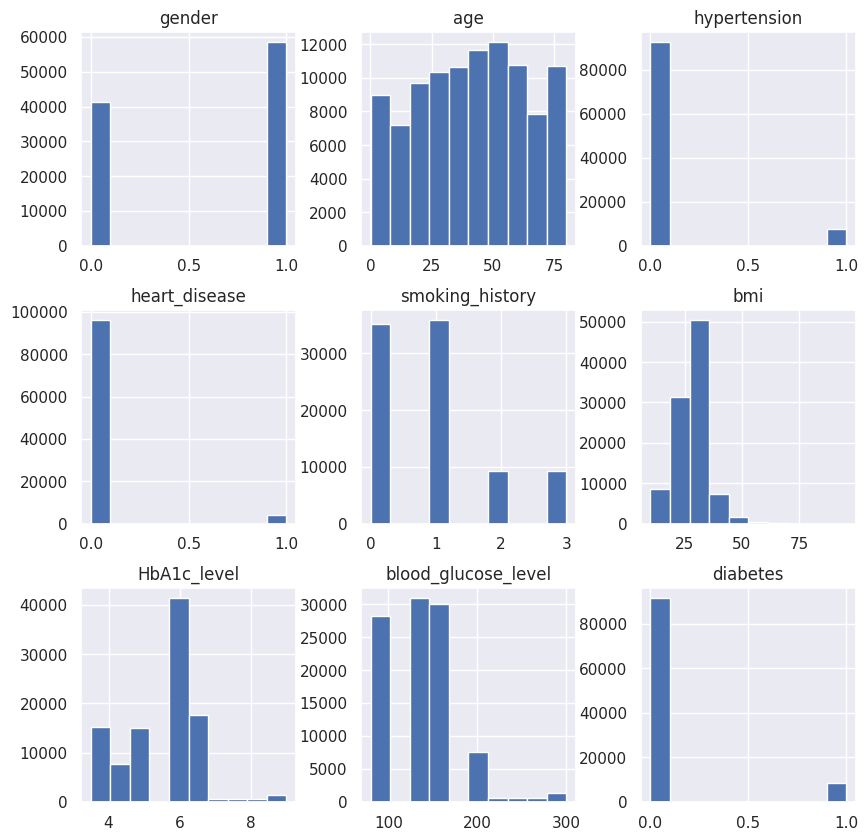

In [33]:
#histogram
df.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: >

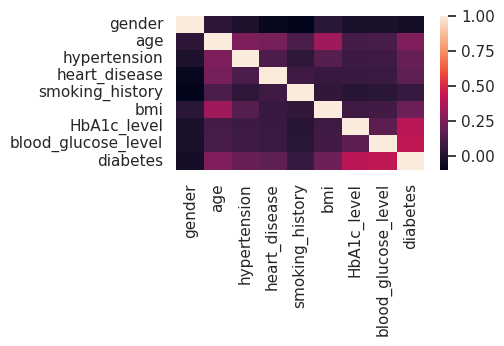

In [34]:
#correlation
sns.heatmap(df.corr())

<Axes: >

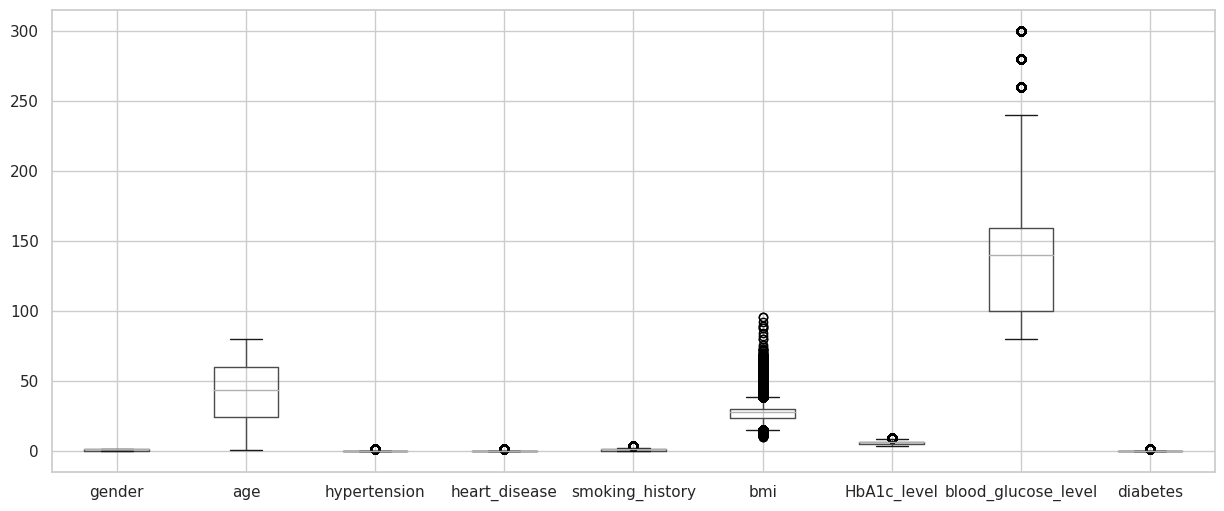

In [35]:
#box plot for outlier visualization
sns.set(style="whitegrid")
df.boxplot(figsize=(15,6))

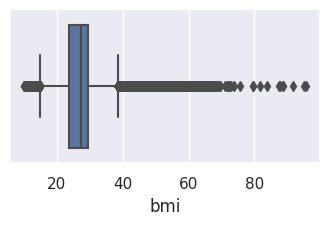

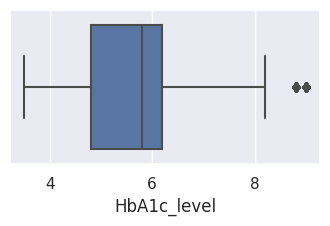

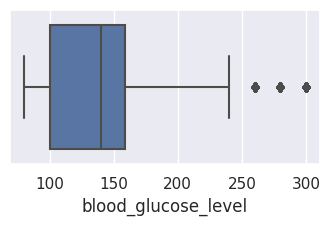

In [36]:
#box plot
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['bmi'])
plt.show()
sns.boxplot(x=df['HbA1c_level'])
plt.show()
sns.boxplot(x=df['blood_glucose_level'])
plt.show()

In [37]:
#outlier remove

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)
#print((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR)))

---Q1--- 
 gender                   0.00
age                     24.00
hypertension             0.00
heart_disease            0.00
smoking_history          0.00
bmi                     23.63
HbA1c_level              4.80
blood_glucose_level    100.00
diabetes                 0.00
Name: 0.25, dtype: float64

---Q3--- 
 gender                   1.00
age                     60.00
hypertension             0.00
heart_disease            0.00
smoking_history          1.00
bmi                     29.58
HbA1c_level              6.20
blood_glucose_level    159.00
diabetes                 0.00
Name: 0.75, dtype: float64

---IQR---
 gender                  1.00
age                    36.00
hypertension            0.00
heart_disease           0.00
smoking_history         1.00
bmi                     5.95
HbA1c_level             1.40
blood_glucose_level    59.00
diabetes                0.00
dtype: float64


In [38]:
#outlier remove
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape
#more than 80 records deleted

((100000, 9), (73074, 9))

Extract Features and Targets

In [39]:
X=df_out.drop(columns=['bmi'])
y=df_out['bmi']

df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})


Splitting train test data 80 20 ratio

In [40]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [41]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((58459, 8), (14615, 8), (58459,), (14615,))

Build the model

In [44]:
# Import necessary libraries for regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train a Linear Regression model
regressor = LinearRegression()
regressor.fit(train_X_imputed, train_y)

# Make predictions on the test set
y_pred = regressor.predict(test_X_imputed)

# Evaluate the model's performance for regression
mse = mean_squared_error(test_y, y_pred)
r2 = r2_score(test_y, y_pred)

# Print the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 19.986489149471122
R-squared (R2): 0.16260340310313903
